# Pandas Foundations

* Link: https://learn.datacamp.com/courses/pandas-foundations

## Course Description

Pandas DataFrames are the most widely used in-memory representation of complex data collections within Python. Whether in finance, a scientific field, or data science, familiarity with pandas is essential. This course teaches you to work with real-world datasets containing both string and numeric data, often structured around time series. You will learn powerful analysis, selection, and visualization techniques in this course.

# Chapter 1 - Data ingestion & inspection

In this chapter, you will be introduced to pandas DataFrames. You will use pandas to import and inspect a variety of datasets, ranging from population data obtained from the World Bank to monthly stock data obtained via Yahoo Finance. You will also practice building DataFrames from scratch and become familiar with the intrinsic data visualization capabilities of pandas.

## Review of pandas DataFrames

### Pandas DataFrame structure

In [2]:
import pandas as pd

filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/titanic.csv'
titanic = pd.read_csv(filepath)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
type(titanic)

pandas.core.frame.DataFrame

### Indexes and columns

In [4]:
titanic.shape

(1309, 14)

In [5]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
type(titanic.columns)

pandas.core.indexes.base.Index

In [7]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

In [8]:
type(titanic.index)

pandas.core.indexes.range.RangeIndex

### Slicing

In [9]:
# First 3 rows and all columns
titanic.iloc[:3,:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
titanic.iloc[-3:,:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


### `.head()`

In [11]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


### `.tail()`

In [13]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [14]:
titanic.tail(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


### `.info()`

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### DataFrame data types

Pandas is aware of the data types in the columns of your DataFrame. It is also aware of null and `NaN` ('Not-a-Number') types which often indicate missing data.

`NaN` is a value often used as a place-holder for missing or otherwise invalid data entries.

### Broadcasting

* Assigning scalar value to column slice broadcasts value to each row.

In [16]:
titanic.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [17]:
import numpy as np
titanic2 = titanic.copy()
titanic2.iloc[::2, -1] = np.nan # Alter last column

In [18]:
titanic2.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,NaN
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [19]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  378 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Series

In [20]:
sex = titanic['sex']
type(sex)

pandas.core.series.Series

In [21]:
sex.head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [22]:
sex = sex.values
type(sex)

numpy.ndarray

## Building DataFrames from scratch

### DataFrames from CSV files

In [23]:
import pandas as pd
filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/titanic.csv'
titanic = pd.read_csv(filepath)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### DataFrames from dict: column by column

In [24]:
import pandas as pd
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitors': [139, 237, 326, 456],
        'signups': [7, 12, 3, 5]}
users = pd.DataFrame(data)
print(users)

  weekday    city  visitors  signups
0     Sun  Austin       139        7
1     Sun  Dallas       237       12
2     Mon  Austin       326        3
3     Mon  Dallas       456        5


### DataFrames from dict: using lists and `zip`

* The `zip()` function in Python 3 and above returns a special zip object, which is essentially a generator. To convert this `zip` object into a `list`, you'll need to use `list()`.

In [25]:
import pandas as pd

cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
signups = [7, 12, 3, 5]
visitors = [139, 237, 326, 456]
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
list_labels = ['city', 'signups', 'visitors', 'weekday']

list_cols = [cities, signups, visitors, weekdays]
zipped = list(zip(list_labels, list_cols))

In [26]:
print(zipped)

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('signups', [7, 12, 3, 5]), ('visitors', [139, 237, 326, 456]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]


In [27]:
data = dict(zipped)
users = pd.DataFrame(data)
print(users)

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


### Broadcasting

In [28]:
users['fees'] = 0 # Broadcasts to entire column
print(users)

     city  signups  visitors weekday  fees
0  Austin        7       139     Sun     0
1  Dallas       12       237     Sun     0
2  Austin        3       326     Mon     0
3  Dallas        5       456     Mon     0


### Broadcasting with a dict

In [29]:
import pandas as pd
heights = [ 59.0, 65.2, 62.9, 65.4, 63.7, 65.7, 64.1 ]
data = {'height': heights, 'sex': 'M'}
results = pd.DataFrame(data)
print(results)

   height sex
0    59.0   M
1    65.2   M
2    62.9   M
3    65.4   M
4    63.7   M
5    65.7   M
6    64.1   M


### Index and columns

In [30]:
results.columns = ['height (in)', 'sex']
results.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
print(results)

   height (in) sex
A         59.0   M
B         65.2   M
C         62.9   M
D         65.4   M
E         63.7   M
F         65.7   M
G         64.1   M


## Importing & exporting data

### Datasets from CSV file

* Dataset: Sunspot observations collected from SILSO
  * Source: SILSO, Daily total sunspot number (http://www.sidc.be/silso/infossntotdaily)

In [31]:
import pandas as pd

filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/ISSN_D_tot.csv'
sunspots = pd.read_csv(filepath)
sunspots

,1818,01,01.1,1818.004,-1,1
0,1818,1,2,1818.007,-1,1
1,1818,1,3,1818.010,-1,1
2,1818,1,4,1818.012,-1,1
3,1818,1,5,1818.015,-1,1
4,1818,1,6,1818.018,-1,1
...,...,...,...,...,...,...
72098,2015,5,27,2015.400,9,0
72099,2015,5,28,2015.403,8,0
72100,2015,5,29,2015.406,22,0
72101,2015,5,30,2015.409,19,0


In [32]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72103 entries, 0 to 72102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1818      72103 non-null  int64  
 1   01        72103 non-null  int64  
 2   01.1      72103 non-null  int64  
 3   1818.004  72103 non-null  float64
 4    -1       72103 non-null  int64  
 5   1         72103 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.3 MB


In [33]:
sunspots.iloc[10:20, :]

,1818,01,01.1,1818.004,-1,1
10,1818,1,12,1818.034,-1,1
11,1818,1,13,1818.037,22,1
12,1818,1,14,1818.040,-1,1
13,1818,1,15,1818.042,-1,1
14,1818,1,16,1818.045,-1,1
15,1818,1,17,1818.048,46,1
16,1818,1,18,1818.051,59,1
17,1818,1,19,1818.053,63,1
18,1818,1,20,1818.056,-1,1
19,1818,1,21,1818.059,-1,1


### Problems

* CSV file has no column headers
  * Columns 0-2: Gregorian date (year, month, day)
  * Column 3: Date as fraction as year
  * Column 4: Daily total sunspot number
  * Column 5: Denitive/provisional indicator (1 or 0)
* Missing values in column 4: indicated by -1
* Dates representation inconvenient

### Using `header` keyword

In [34]:
sunspots = pd.read_csv(filepath, header=None)
sunspots.iloc[10:20, :]

,0,1,2,3,4,5
10,1818,1,11,1818.031,-1,1
11,1818,1,12,1818.034,-1,1
12,1818,1,13,1818.037,22,1
13,1818,1,14,1818.040,-1,1
14,1818,1,15,1818.042,-1,1
15,1818,1,16,1818.045,-1,1
16,1818,1,17,1818.048,46,1
17,1818,1,18,1818.051,59,1
18,1818,1,19,1818.053,63,1
19,1818,1,20,1818.056,-1,1


### Using `names` keyword

In [35]:
col_names = ['year', 'month', 'day', 'dec_date',
             'sunspots', 'definite']
sunspots = pd.read_csv(filepath, header=None,
                       names=col_names)
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,definite
10,1818,1,11,1818.031,-1,1
11,1818,1,12,1818.034,-1,1
12,1818,1,13,1818.037,22,1
13,1818,1,14,1818.040,-1,1
14,1818,1,15,1818.042,-1,1
15,1818,1,16,1818.045,-1,1
16,1818,1,17,1818.048,46,1
17,1818,1,18,1818.051,59,1
18,1818,1,19,1818.053,63,1
19,1818,1,20,1818.056,-1,1


### Using `na_values` keyword

In [36]:
sunspots = pd.read_csv(filepath, header=None,
                       names=col_names, na_values='-1')
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,definite
10,1818,1,11,1818.031,-1,1
11,1818,1,12,1818.034,-1,1
12,1818,1,13,1818.037,22,1
13,1818,1,14,1818.040,-1,1
14,1818,1,15,1818.042,-1,1
15,1818,1,16,1818.045,-1,1
16,1818,1,17,1818.048,46,1
17,1818,1,18,1818.051,59,1
18,1818,1,19,1818.053,63,1
19,1818,1,20,1818.056,-1,1


In [37]:
# In fact, the -1 values are preceded by a space
sunspots = pd.read_csv(filepath, header=None,
                       names=col_names, na_values=' -1')
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,definite
10,1818,1,11,1818.031,NaN,1
11,1818,1,12,1818.034,NaN,1
12,1818,1,13,1818.037,22.0,1
13,1818,1,14,1818.040,NaN,1
14,1818,1,15,1818.042,NaN,1
15,1818,1,16,1818.045,NaN,1
16,1818,1,17,1818.048,46.0,1
17,1818,1,18,1818.051,59.0,1
18,1818,1,19,1818.053,63.0,1
19,1818,1,20,1818.056,NaN,1


#### Specifying the column

In [38]:
sunspots = pd.read_csv(filepath, header=None,
                       names=col_names, na_values={'sunspots':[' -1']})
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,definite
10,1818,1,11,1818.031,NaN,1
11,1818,1,12,1818.034,NaN,1
12,1818,1,13,1818.037,22.0,1
13,1818,1,14,1818.040,NaN,1
14,1818,1,15,1818.042,NaN,1
15,1818,1,16,1818.045,NaN,1
16,1818,1,17,1818.048,46.0,1
17,1818,1,18,1818.051,59.0,1
18,1818,1,19,1818.053,63.0,1
19,1818,1,20,1818.056,NaN,1


### Using `parse_dates` keyword

In [39]:
sunspots = pd.read_csv(filepath, header=None,
                       names=col_names, na_values={'sunspots':[' -1']},
parse_dates=[[0, 1, 2]])
sunspots.iloc[10:20, :]

,year_month_day,dec_date,sunspots,definite
10,1818-01-11,1818.031,NaN,1
11,1818-01-12,1818.034,NaN,1
12,1818-01-13,1818.037,22.0,1
13,1818-01-14,1818.040,NaN,1
14,1818-01-15,1818.042,NaN,1
15,1818-01-16,1818.045,NaN,1
16,1818-01-17,1818.048,46.0,1
17,1818-01-18,1818.051,59.0,1
18,1818-01-19,1818.053,63.0,1
19,1818-01-20,1818.056,NaN,1


### Inspecting DataFrame

In [40]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72104 entries, 0 to 72103
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_month_day  72104 non-null  datetime64[ns]
 1   dec_date        72104 non-null  float64       
 2   sunspots        68857 non-null  float64       
 3   definite        72104 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.2 MB


### Using dates as index

In [41]:
sunspots.index = sunspots['year_month_day']
sunspots.index.name = 'date'
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72104 entries, 1818-01-01 to 2015-05-31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_month_day  72104 non-null  datetime64[ns]
 1   dec_date        72104 non-null  float64       
 2   sunspots        68857 non-null  float64       
 3   definite        72104 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.8 MB


### Trimming redundant columns

In [42]:
cols = ['sunspots', 'definite']
sunspots = sunspots[cols]
sunspots.iloc[10:20, :]

,sunspots,definite
date,,
1818-01-11,NaN,1
1818-01-12,NaN,1
1818-01-13,22.0,1
1818-01-14,NaN,1
1818-01-15,NaN,1
1818-01-16,NaN,1
1818-01-17,46.0,1
1818-01-18,59.0,1
1818-01-19,63.0,1


### Writing files

In [43]:
out_csv = 'sunspots.csv'
sunspots.to_csv(out_csv)

out_tsv = 'sunspots.tsv'
sunspots.to_csv(out_tsv, sep='\t')

out_xlsx = 'sunspots.xlsx'
sunspots.to_excel(out_xlsx)

## Exercise

### Delimiters, headers, and extensions

* Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

* In this exercise, you have monthly stock data for four companies downloaded from `Yahoo Finance`. The data is stored as one row for each company and each column is the end-of-month closing price. The file name is given to you in the variable `file_messy`.

* In addition, this file has three aspects that may cause trouble for lesser tools: multiple header lines, comment records (rows) interleaved throughout the data rows, and space delimiters instead of commas.

* Your job is to use pandas to read the data from this problematic `file_messy` using non-default input options with `read_csv()` so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file with the variable `file_clean` that has been prepared for you, as you might do in a real data workflow.

In [44]:
import pandas as pd
filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
file_messy = filepath + 'messy_stock_data.tsv'

# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)
print(df1.head(), '\n\n')

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('clean_stock_data.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                         


     name     Jan     Feb     Mar  ...     Sep     Oct     Nov     Dec
0     IBM  156.08  160.01  159.81  ...  145.36  146.11  137.21  137.96
1    MSFT   45.51   43.08   42.13  ...   43.56   48.70   53.88   55.40
2  GOOGLE  512.42  537.99  5

## Plotting with pandas

### AAPL stock data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
aapl = pd.read_csv(filepath + 'aapl.csv', index_col='Date',
                   parse_dates=True)
aapl.head(6)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
2008-10-07,100.48,101.50,88.95,89.16,67099000,89.16


In [46]:
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Plotting arrays (matplotlib)

In [47]:
close_arr = aapl['Close'].values
type(close_arr)

numpy.ndarray

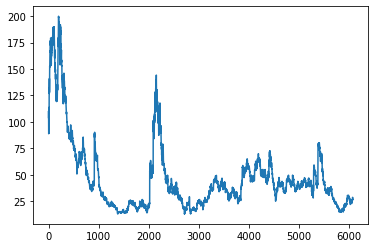

In [48]:
plt.plot(close_arr)

### Plotting Series (matplotlib)

In [49]:
close_series = aapl['Close']
type(close_series)

pandas.core.series.Series

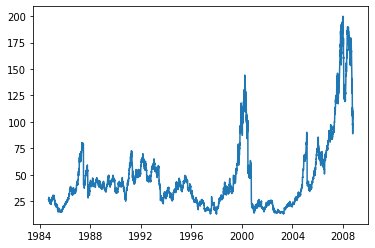

In [50]:
plt.plot(close_series)

### Plotting Series (pandas)

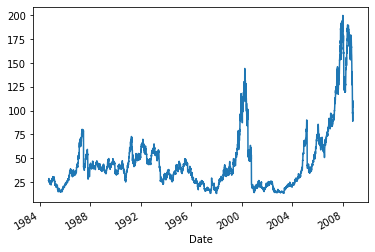

In [51]:
close_series.plot() # plots Series directly

### Plotting DataFrames (pandas)

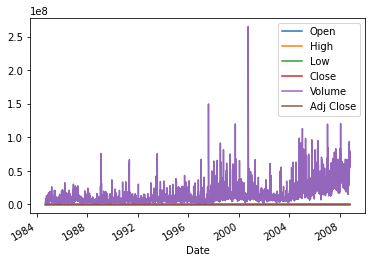

In [52]:
aapl.plot() # plots all Series at once

### Plotting DataFrames (matplotlib)

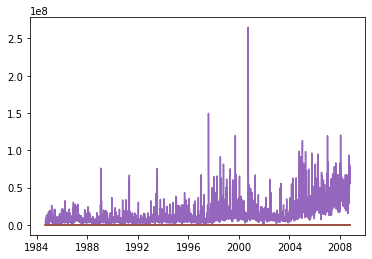

In [53]:
plt.plot(aapl) # plots all columns at once

### Fixing scales

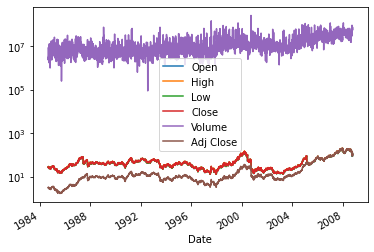

In [54]:
ax = aapl.plot()
ax.set_yscale('log') # logarithmic scale on vertical axis

### Customizing plots

(730486.0, 730851.0, 0.0, 100.0)

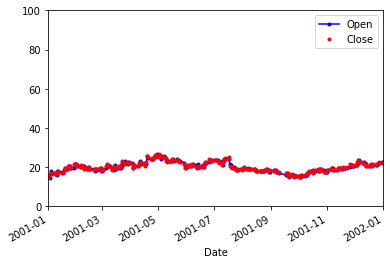

In [55]:
aapl['Open'].plot(color='b', style='.-', legend=True)
aapl['Close'].plot(color='r', style='.', legend=True)
plt.axis(('2001', '2002', 0, 100))

### Saving plots

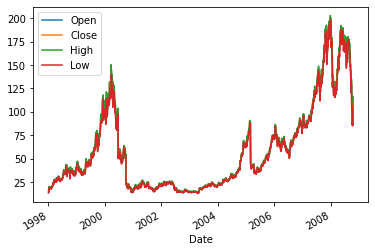

In [56]:
aapl.loc['2008':'1998',['Open','Close','High','Low']].plot()

In [57]:
plt.savefig('aapl.png')
plt.savefig('aapl.jpg')
plt.savefig('aapl.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

# Chapter 2 - Exploratory data analysis

Now that you’ve learned how to ingest and inspect your data, you will next learn how to explore it visually and quantitatively. This process, known as exploratory data analysis (EDA), is a crucial component of any data science project. pandas has powerful methods that help with statistical and visual EDA. In this chapter, you will learn how and when to apply these techniques.

## Visual exploratory data analysis

### The iris dataset

* Famous data set in pattern recognition
  * 150 observations, 4 features each
  * Sepal length
  * Sepal width
  * Petal length
  * Petal width
  * 3 species: setosa, versicolor, virginica
  * Source: R.A. Fisher, Annual Eugenics, 7, Part II, 179 188 (1936) (http://archive.ics.uci.edu/ml/datasets/Iris)

### Data import

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
iris = pd.read_csv(filepath + 'iris.csv')
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
print(iris.shape)

(150, 5)


### Line plot

In [59]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


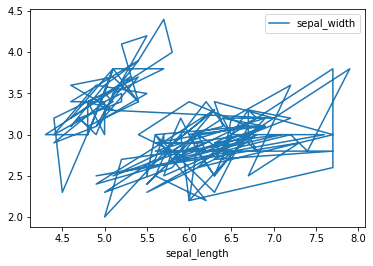

In [60]:
iris.plot(x='sepal_length', y='sepal_width')
plt.show()

### Scatter plot

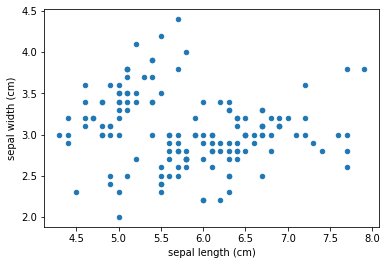

In [61]:
iris.plot(x='sepal_length', y='sepal_width',kind='scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

### Box plot

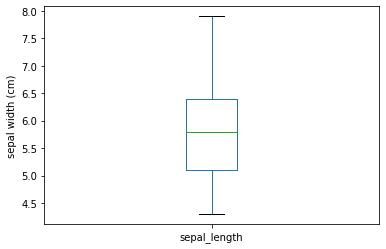

In [62]:
iris.plot(y='sepal_length', kind='box')
plt.ylabel('sepal width (cm)')
plt.show()

### Histogram

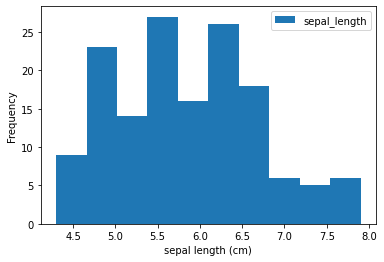

In [63]:
iris.plot(y='sepal_length', kind='hist')
plt.xlabel('sepal length (cm)')
plt.show()

#### Histogram options

* bins (integer): number ofintervals or bins
* range (tuple): extrema of bins (minimum, maximum)
* normed (boolean): whether to normalize to one
* cumulative (boolean): computeCumulative Distribution Function
(CDF)
* ... more matplotlib customizations

#### Customizing histogram

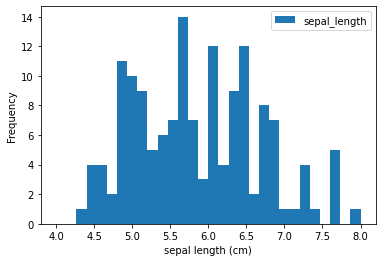

In [64]:
iris.plot(y='sepal_length', kind='hist',
          bins=30, range=(4,8))
plt.xlabel('sepal length (cm)')
plt.show()

#### Cumulative distribution

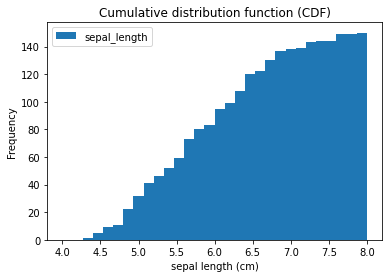

In [65]:
iris.plot(y='sepal_length', kind='hist', bins=30,
          range=(4,8), cumulative=True)
plt.xlabel('sepal length (cm)')
plt.title('Cumulative distribution function (CDF)')
plt.show()

#### Word of warning

* Three different DataFrame plot idioms
  * iris.plot(kind='hist')
  * iris.plt.hist()
  * iris.hist()
* Syntax/results differ!
* Pandas API still evolving: check documentation!

### Using subplots

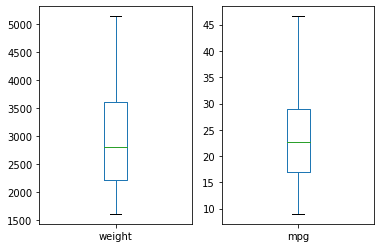

In [66]:
import pandas as pd

filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
df = pd.read_csv(filepath + 'auto-mpg.csv')
cols = ['weight', 'mpg']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

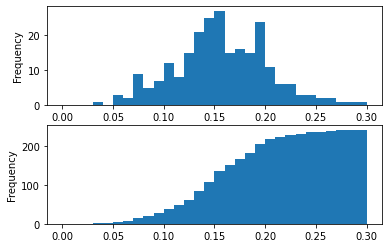

In [67]:
import pandas as pd
filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
df = pd.read_csv(filepath + 'tips.csv')

# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF (probability density function)
df.fraction.plot(ax=axes[0], kind='hist', bins=30, range=(0,.3))

# Plot the CDF (cumulative density function)
df.fraction.plot(ax=axes[1], kind='hist', bins=30, cumulative=True, range=(0,.3))

## Statistical exploratory data analysis

### Summarizing with `describe()`

Describe
* count: number of entries
* mean: average of entries
* std: standard deviation
* min: minimum entry
* 25%: first quartile
* 50%: median or second quartile
* 75%:third quartile
* max: maximum entry

In [68]:
iris.describe() # summary statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Counts

In [69]:
iris['sepal_length'].count() # Applied to Series

150

In [70]:
iris['sepal_width'].count() # Applied to Series

150

In [71]:
iris[['petal_length', 'petal_width']].count() # Applied to DataFrame

petal_length    150
petal_width     150
dtype: int64

In [72]:
type(iris[['petal_length', 'petal_width']].count()) # returns Series

pandas.core.series.Series

### Averages

In [73]:
iris['sepal_length'].mean() # Applied to Series

5.843333333333335

In [74]:
iris.mean() # Applied to entire DataFrame

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

### Standard deviations

In [75]:
iris.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

### Medians

In [76]:
iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

### Medians & 0.5 quantiles

In [77]:
iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [78]:
q = 0.5
iris.quantile(q)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

### Inter-quartile range (IQR)

In [79]:
q = [0.25, 0.75]
iris.quantile(q)

,sepal_length,sepal_width,petal_length,petal_width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


### Ranges

In [80]:
iris.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         Setosa
dtype: object

In [81]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         Virginica
dtype: object

### Box plots

Text(0, 0.5, '[cm]')

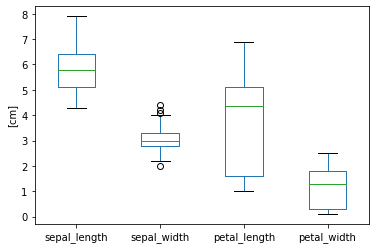

In [82]:
ax = iris.plot(kind='box')
ax.set_ylabel('[cm]')

### Percentiles as quantiles

In [83]:
iris.describe() # summary statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Separating populations

### Describe species column

* count: # non-null entries
* unique: # distinct values
* top: most frequent category
* freq: # occurrences oftop

In [84]:
iris['species'].describe()

count           150
unique            3
top       Virginica
freq             50
Name: species, dtype: object

### Unique & factors

In [85]:
iris['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

### Filtering by species

In [92]:
indices = iris['species'] == 'Setosa'
setosa = iris.loc[indices,:] # extract new DataFrame
indices = iris['species'] == 'Versicolor'
versicolor = iris.loc[indices,:] # extract new DataFrame
indices = iris['species'] == 'Virginica'
virginica = iris.loc[indices,:] # extract new DataFrame

### Checking species

In [93]:
setosa['species'].unique()

array(['Setosa'], dtype=object)

In [94]:
versicolor['species'].unique()

array(['Versicolor'], dtype=object)

In [95]:
virginica['species'].unique()

array(['Virginica'], dtype=object)

### Deleting species

In [96]:
del setosa['species'], versicolor['species'], virginica['species']

### Checking indexes

In [97]:
setosa.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [98]:
versicolor.head(2)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5


In [99]:
versicolor.head(2)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5


### Visual EDA: all data

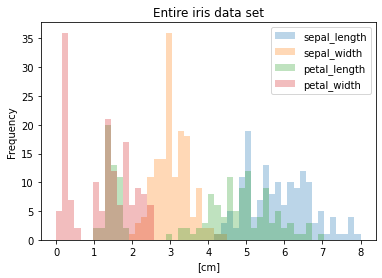

In [100]:
iris.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Entire iris data set')
plt.xlabel('[cm]')
plt.show()

### Visual EDA: individual factors

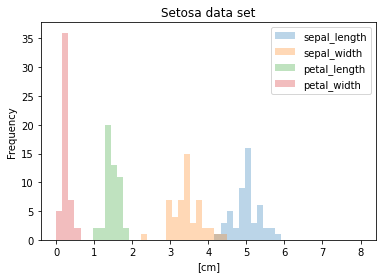

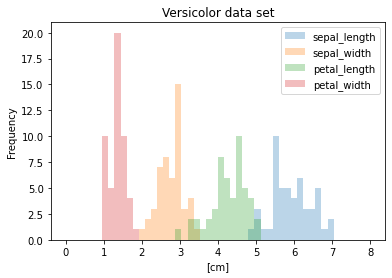

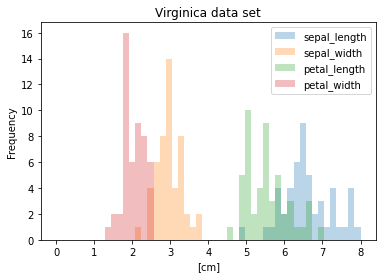

In [101]:
setosa.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Setosa data set')
plt.xlabel('[cm]')

versicolor.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Versicolor data set')
plt.xlabel('[cm]')

virginica.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Virginica data set')
plt.xlabel('[cm]')

plt.show()

### Statistical EDA: describe()

In [102]:
describe_all = iris.describe()
print(describe_all)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Computing errors

In [103]:
describe_setosa = setosa.describe()
describe_versicolor = versicolor.describe()
describe_virginica = virginica.describe()

In [105]:
error_setosa = 100 * np.abs(describe_setosa - describe_all)
error_setosa = error_setosa/describe_setosa

error_versicolor = 100 * np.abs(describe_versicolor - describe_all)
error_versicolor = error_versicolor/describe_versicolor

error_virginica = 100 * np.abs(describe_virginica - describe_all)
error_virginica = error_virginica/describe_virginica

In [106]:
print(error_setosa)

       sepal_length  sepal_width  petal_length  petal_width
count    200.000000   200.000000    200.000000   200.000000
mean      16.726595    10.812913    157.045144   387.533875
std      134.919250    14.984768    916.502136   623.284534
min        0.000000    13.043478      0.000000     0.000000
25%        6.250000    12.500000     14.285714    50.000000
50%       16.000000    11.764706    190.000000   550.000000
75%       23.076923    10.204082    223.809524   500.000000
max       36.206897     0.000000    263.157895   316.666667


# Chapter 3 - Time series in pandas

In this chapter, you will learn how to manipulate and visualize time series data using pandas. You will become familiar with concepts such as upsampling, downsampling, and interpolation. You will practice using method chaining to efficiently filter your data and perform time series analyses. From stock prices to flight timings, time series data can be found in a wide variety of domains, and being able to effectively work with it is an invaluable skill.

## Indexing time series

### Using pandas to read datetime objects

* read_csv() function
  * Can read strings into datetime objects
  * Need to specify ‘parse_dates=True’
* ISO 8601 format
  * yyyy-mm-dd hh:mm:ss

### Product sales CSV - Parse dates

In [115]:
import pandas as pd

filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
sales = pd.read_csv(filepath + 'sales-feb-2015.csv', 
                    parse_dates=True, index_col='Date')
sales.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


In [110]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-26 08:57:45 to 2015-02-21 20:41:47
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  20 non-null     object
 1   Product  20 non-null     object
 2   Units    20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 640.0+ bytes


### Selecting single datetime

* Format of datetime: '%Y-%m-%d %H%M%S'

In [114]:
sales.loc['2015-02-19', 'Company']

Date
2015-02-19 16:02:58    Mediacore
2015-02-19 10:59:33    Mediacore
Name: Company, dtype: object

### Selecting whole day

In [116]:
sales.loc['2015-2-5']

,Company,Product,Units
Date,,,
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-05 22:05:03,Hooli,Service,10


### Partial datetime string selection

* Alternative formats:
  * sales.loc[‘February 5, 2015’]
  * sales.loc[‘2015-Feb-5’]
* Whole month: sales.loc[‘2015-2’]
* Whole year: sales.loc[‘2015’

### Slicing using dates/times

In [117]:
sales.loc['2015-2-16':'2015-2-20']

,Company,Product,Units
Date,,,
2015-02-16 12:09:19,Hooli,Software,10
2015-02-19 16:02:58,Mediacore,Service,10
2015-02-19 10:59:33,Mediacore,Hardware,16


### Convert strings to datetime

In [125]:
evening_2_11 = pd.to_datetime(['2015-02-19 10:59:33', '2015-02-19 13:02:58', '2015-02-19 15:02:58', '2015-02-19 16:02:58'])
evening_2_11

DatetimeIndex(['2015-02-19 10:59:33', '2015-02-19 13:02:58',
               '2015-02-19 15:02:58', '2015-02-19 16:02:58'],
              dtype='datetime64[ns]', freq=None)

### Reindexing DataFrame

Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with `NaN` by default.

In [126]:
sales.reindex(evening_2_11)

,Company,Product,Units
2015-02-19 10:59:33,Mediacore,Hardware,16.0
2015-02-19 13:02:58,NaN,NaN,NaN
2015-02-19 15:02:58,NaN,NaN,NaN
2015-02-19 16:02:58,Mediacore,Service,10.0


In [130]:
sales.sort_index(inplace=True)
sales.reindex(evening_2_11, method='bfill')

,Company,Product,Units
2015-02-19 10:59:33,Mediacore,Hardware,16
2015-02-19 13:02:58,Mediacore,Service,10
2015-02-19 15:02:58,Mediacore,Service,10
2015-02-19 16:02:58,Mediacore,Service,10


In [131]:
sales.sort_index(inplace=True)
sales.reindex(evening_2_11, method='ffill')

,Company,Product,Units
2015-02-19 10:59:33,Mediacore,Hardware,16
2015-02-19 13:02:58,Mediacore,Hardware,16
2015-02-19 15:02:58,Mediacore,Hardware,16
2015-02-19 16:02:58,Mediacore,Service,10


## Resampling time series data

In [132]:
import pandas as pd
filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
sales = pd.read_csv(filepath + 'sales-feb-2015.csv', 
                    parse_dates=True, index_col='Date')
sales.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


### Resampling

* Statistical methods over different time intervals
  * mean(), sum(), count(), etc.
* Downsampling
  * reduce datetime rows to slower frequency
* Upsampling
  * increase datetime rows to faster frequency

### Aggregating means

In [133]:
daily_mean = sales.resample('D').mean()
daily_mean

,Units
Date,
2015-02-02,6.0
2015-02-03,13.0
2015-02-04,13.5
2015-02-05,14.5
2015-02-06,NaN
2015-02-07,1.0
2015-02-08,NaN
2015-02-09,13.0
2015-02-10,NaN


### Verifying

In [134]:
print(daily_mean.loc['2015-2-2'])

Units    6.0
Name: 2015-02-02 00:00:00, dtype: float64


In [135]:
print(sales.loc['2015-2-2', 'Units'])

Date
2015-02-02 08:33:01    3
2015-02-02 20:54:49    9
Name: Units, dtype: int64


In [136]:
sales.loc['2015-2-2', 'Units'].mean()

6.0

### Method chaining

* sum()
* sum().max()

In [137]:
sales.resample('D').sum()

,Units
Date,
2015-02-02,12
2015-02-03,13
2015-02-04,27
2015-02-05,29
2015-02-06,0
2015-02-07,1
2015-02-08,0
2015-02-09,26
2015-02-10,0


In [138]:
sales.resample('D').sum().max()

Units    29
dtype: int64

### Resampling strings

In [139]:
sales.resample('W').count() # Week

,Company,Product,Units
Date,,,
2015-02-08,8,8,8
2015-02-15,4,4,4
2015-02-22,5,5,5
2015-03-01,3,3,3


### Resampling frequencies

* 'min', 'T': minute
* 'H': hour
* 'D': day
* 'B': business day
* 'W': week
* 'M': month
* 'Q': quarter
* 'A': year

### Multiplying frequencies

In [140]:
sales.loc[:,'Units'].resample('2W').sum() # 2 weeks

Date
2015-02-08    82
2015-02-22    79
2015-03-08    15
Freq: 2W-SUN, Name: Units, dtype: int64

### Upsampling and filling

* Creating more samples in an specific time period

In [146]:
two_days = sales.sort_index().loc['2015-2-4':'2015-2-5','Units'].resample('4H').ffill()
two_days

Date
2015-02-04 12:00:00     NaN
2015-02-04 16:00:00    13.0
2015-02-04 20:00:00    13.0
2015-02-05 00:00:00    14.0
2015-02-05 04:00:00    19.0
2015-02-05 08:00:00    19.0
2015-02-05 12:00:00    19.0
2015-02-05 16:00:00    19.0
2015-02-05 20:00:00    19.0
Freq: 4H, Name: Units, dtype: float64

### Exercise

#### Rolling mean and frequency

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them here.

To use the `.rolling()` method, you must always use method chaining, first calling `.rolling()` and then chaining an aggregation method after it.

In [156]:
import pandas as pd
filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/weather_data_austin_2010.csv'
df = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
df.head(3)

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0


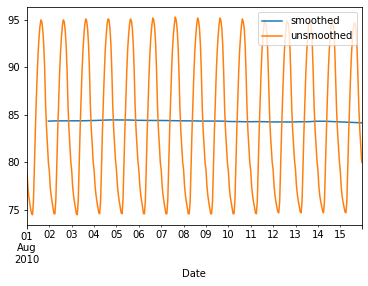

In [157]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

#### Resample and roll with it

As of pandas version 0.18.0, the interface for applying rolling transformations to time series has become more consistent and flexible, and feels somewhat like a `groupby` (If you do not know what a `groupby` is, don't worry, you will learn about it in the next course!).

You can now flexibly chain together resampling and rolling operations. Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data.

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


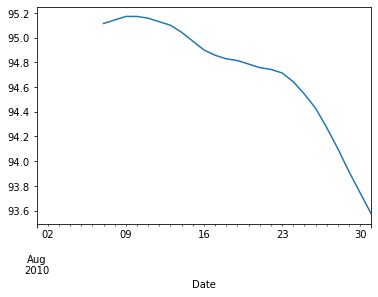

In [159]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

daily_highs_smoothed.plot()

## Manipulating time series data

In [181]:
import pandas as pd
filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
sales = pd.read_csv(filepath + 'sales-feb-2015.csv', parse_dates=['Date'])
sales.head()

,Date,Company,Product,Units
0,2015-02-26 08:57:45,Streeplex,Service,4
1,2015-02-16 12:09:19,Hooli,Software,10
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-02 08:33:01,Hooli,Software,3
4,2015-02-25 00:29:00,Initech,Service,10


### String methods

In [163]:
sales['Company'].str.upper()

0           STREEPLEX
1               HOOLI
2             INITECH
3               HOOLI
4             INITECH
5     ACME COPORATION
6           STREEPLEX
7             INITECH
8     ACME COPORATION
9           MEDIACORE
10    ACME COPORATION
11              HOOLI
12          STREEPLEX
13              HOOLI
14          STREEPLEX
15          MEDIACORE
16          MEDIACORE
17          MEDIACORE
18          MEDIACORE
19              HOOLI
Name: Company, dtype: object

### Substring matching

In [164]:
sales['Product'].str.contains('ware')

0     False
1      True
2      True
3      True
4     False
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16     True
17     True
18     True
19     True
Name: Product, dtype: bool

### Boolean arithmetic

In [165]:
True + False

1

In [166]:
True + True

2

In [167]:
False + False

0

### Boolean reduction

In [168]:
sales['Product'].str.contains('ware').sum()

14

### Datetime methods

In [171]:
sales['Date'].dt.hour

0      8
1     12
2     14
3      8
4      0
5      1
6      8
7     20
8     21
9     13
10    22
11    22
12     8
13    22
14    15
15    16
16    10
17    20
18     5
19    20
Name: Date, dtype: int64

### Set timezone

In [172]:
central = sales['Date'].dt.tz_localize('US/Central')
central

0    2015-02-26 08:57:45-06:00
1    2015-02-16 12:09:19-06:00
2    2015-02-03 14:14:18-06:00
3    2015-02-02 08:33:01-06:00
4    2015-02-25 00:29:00-06:00
5    2015-02-05 01:53:06-06:00
6    2015-02-09 08:57:30-06:00
7    2015-02-11 20:03:08-06:00
8    2015-02-04 21:52:45-06:00
9    2015-02-09 13:09:55-06:00
10   2015-02-07 22:58:10-06:00
11   2015-02-11 22:50:44-06:00
12   2015-02-26 08:58:51-06:00
13   2015-02-05 22:05:03-06:00
14   2015-02-04 15:36:29-06:00
15   2015-02-19 16:02:58-06:00
16   2015-02-19 10:59:33-06:00
17   2015-02-02 20:54:49-06:00
18   2015-02-21 05:01:26-06:00
19   2015-02-21 20:41:47-06:00
Name: Date, dtype: datetime64[ns, US/Central]

### Convert timezone

In [173]:
central.dt.tz_convert('US/Eastern')

0    2015-02-26 09:57:45-05:00
1    2015-02-16 13:09:19-05:00
2    2015-02-03 15:14:18-05:00
3    2015-02-02 09:33:01-05:00
4    2015-02-25 01:29:00-05:00
5    2015-02-05 02:53:06-05:00
6    2015-02-09 09:57:30-05:00
7    2015-02-11 21:03:08-05:00
8    2015-02-04 22:52:45-05:00
9    2015-02-09 14:09:55-05:00
10   2015-02-07 23:58:10-05:00
11   2015-02-11 23:50:44-05:00
12   2015-02-26 09:58:51-05:00
13   2015-02-05 23:05:03-05:00
14   2015-02-04 16:36:29-05:00
15   2015-02-19 17:02:58-05:00
16   2015-02-19 11:59:33-05:00
17   2015-02-02 21:54:49-05:00
18   2015-02-21 06:01:26-05:00
19   2015-02-21 21:41:47-05:00
Name: Date, dtype: datetime64[ns, US/Eastern]

### Method chaining

In [174]:
sales['Date'].dt.tz_localize('US/Central').dt.tz_convert('US/Eastern')

0    2015-02-26 09:57:45-05:00
1    2015-02-16 13:09:19-05:00
2    2015-02-03 15:14:18-05:00
3    2015-02-02 09:33:01-05:00
4    2015-02-25 01:29:00-05:00
5    2015-02-05 02:53:06-05:00
6    2015-02-09 09:57:30-05:00
7    2015-02-11 21:03:08-05:00
8    2015-02-04 22:52:45-05:00
9    2015-02-09 14:09:55-05:00
10   2015-02-07 23:58:10-05:00
11   2015-02-11 23:50:44-05:00
12   2015-02-26 09:58:51-05:00
13   2015-02-05 23:05:03-05:00
14   2015-02-04 16:36:29-05:00
15   2015-02-19 17:02:58-05:00
16   2015-02-19 11:59:33-05:00
17   2015-02-02 21:54:49-05:00
18   2015-02-21 06:01:26-05:00
19   2015-02-21 21:41:47-05:00
Name: Date, dtype: datetime64[ns, US/Eastern]

### Upsample

In [183]:
sales.set_index('Date', inplace=True)
sales.resample('D').first()

,Company,Product,Units
Date,,,
2015-02-02,Hooli,Software,3.0
2015-02-03,Initech,Software,13.0
2015-02-04,Streeplex,Software,13.0
2015-02-05,Acme Coporation,Software,19.0
2015-02-06,NaN,NaN,NaN
2015-02-07,Acme Coporation,Hardware,1.0
2015-02-08,NaN,NaN,NaN
2015-02-09,Streeplex,Service,19.0
2015-02-10,NaN,NaN,NaN


### Interpolate missing data

In [185]:
sales['Units'].resample('D').first().interpolate('linear')

Date
2015-02-02     3.00
2015-02-03    13.00
2015-02-04    13.00
2015-02-05    19.00
2015-02-06    10.00
2015-02-07     1.00
2015-02-08    10.00
2015-02-09    19.00
2015-02-10    13.00
2015-02-11     7.00
2015-02-12     7.60
2015-02-13     8.20
2015-02-14     8.80
2015-02-15     9.40
2015-02-16    10.00
2015-02-17    12.00
2015-02-18    14.00
2015-02-19    16.00
2015-02-20     9.50
2015-02-21     3.00
2015-02-22     4.75
2015-02-23     6.50
2015-02-24     8.25
2015-02-25    10.00
2015-02-26     4.00
Freq: D, Name: Units, dtype: float64

## Time series visualization

### S&P 500 Data

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
sp500 = pd.read_csv(filepath + 'sp500.csv', parse_dates=True, index_col='Date')
sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893


### Pandas plot

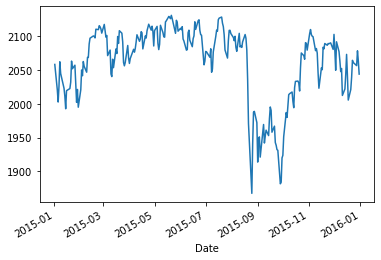

In [188]:
sp500['Close'].plot()
plt.show()

### Labels and title

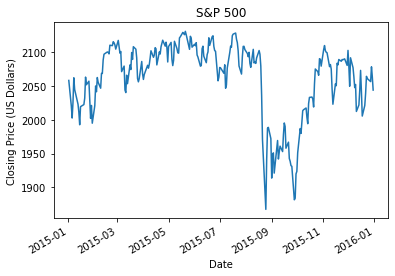

In [189]:
sp500['Close'].plot(title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

### One week

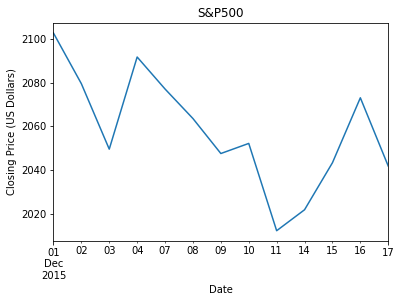

In [191]:
sp500.loc['2015-12-1':'2015-12-17','Close'].plot(title='S&P500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

### Plot styles

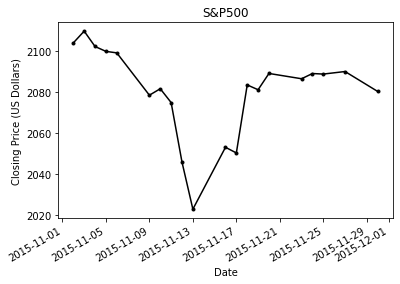

In [192]:
sp500.loc['2015-11', 'Close'].plot(style='k.-',title='S&P500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

### More plot styles

* Style format string
  * color (k: black)
  * marker (. : dot)
  * line type (-: solid)
* Color
  * b: blue
  * g: green
  * r: red
  * c: cyan
* Marker
  * o: circle
  * *: star
  * s: square
  * +: plus
* Line
  * ':' : dotted
  * '-' : dashed

### Area plot

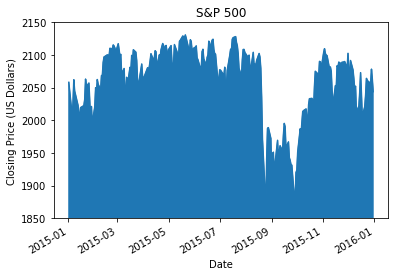

In [202]:
sp500['Close'].plot(kind='area', title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.ylim(1850, 2150)
plt.show()

### Multiple columns

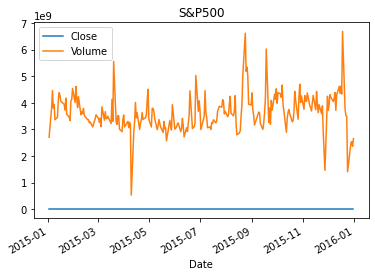

In [204]:
sp500.loc['2015', ['Close', 'Volume']].plot(title='S&P500')
plt.show()

### Subplots

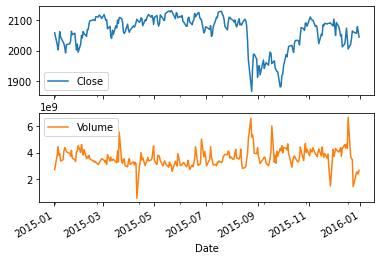

In [205]:
sp500.loc['2015', ['Close','Volume']].plot(subplots=True)
plt.show()

# Chapter 4 - Case Study - Sunlight in Austin

Working with real-world weather and climate data, this chapter will allow you to apply all of the skills you have acquired in this course. You will use pandas to manipulate the data into a usable form for analysis and systematically explore it using the techniques you’ve learned.

In [218]:
import pandas as pd

filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/04.1 - Course - Pandas Foundations/datasets/'
climate2010 = pd.read_csv(filepath + 'weather_data_austin_2010.csv', parse_dates=['Date'], index_col='Date')
climate2010.head(3)

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0


## Statistical exploratory data analysis

In [230]:
climate2010.loc['2010-01-01 00:00:00'] # datetime

Temperature    46.2
DewPoint       37.5
Pressure        1.0
Name: 2010-01-01 00:00:00, dtype: float64

In [231]:
climate2010['2010-06-01'] # Entire day

,Temperature,DewPoint,Pressure
Date,,,
2010-06-01 00:00:00,74.0,67.9,1.0
2010-06-01 01:00:00,72.6,68.0,1.0
2010-06-01 02:00:00,72.0,67.9,1.0
2010-06-01 03:00:00,71.6,67.9,1.0
2010-06-01 04:00:00,71.1,67.7,1.0
2010-06-01 05:00:00,70.8,67.6,1.0
2010-06-01 06:00:00,71.2,67.6,1.0
2010-06-01 07:00:00,72.7,68.6,1.0
2010-06-01 08:00:00,75.3,69.0,1.0


In [233]:
climate2010['2010-09':'2010-10'] # 2 months

,Temperature,DewPoint,Pressure
Date,,,
2010-09-01 00:00:00,77.6,69.2,1.0
2010-09-01 01:00:00,76.1,69.4,1.0
2010-09-01 02:00:00,75.3,69.5,1.0
2010-09-01 03:00:00,74.5,69.4,1.0
2010-09-01 04:00:00,73.9,69.3,1.0
...,...,...,...
2010-10-31 19:00:00,65.2,53.5,1.0
2010-10-31 20:00:00,63.4,53.8,1.0
2010-10-31 21:00:00,62.0,53.7,1.0


## Visual exploratory data analysis

### Line plots in pandas

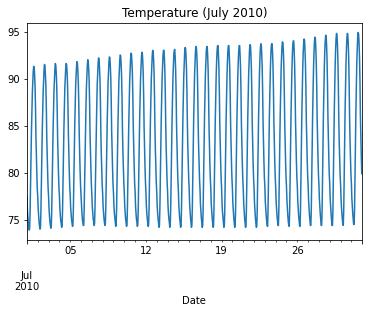

In [234]:
import matplotlib.pyplot as plt
climate2010.Temperature['2010-07'].plot()
plt.title('Temperature (July 2010)')
plt.show()

### Histograms in pandas

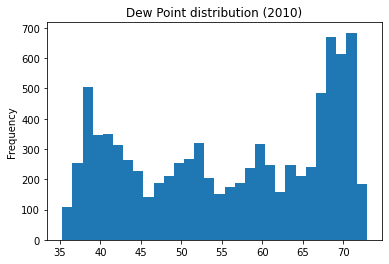

In [236]:
climate2010['DewPoint'].plot(kind='hist', bins=30)
plt.title('Dew Point distribution (2010)')
plt.show()

### Box plots in pandas

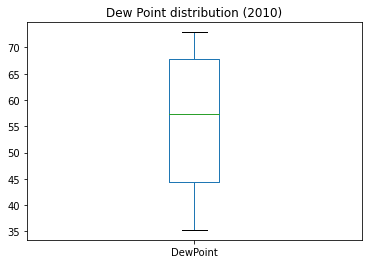

In [237]:
climate2010['DewPoint'].plot(kind='box')
plt.title('Dew Point distribution (2010)')
plt.show()

### Subplots in pandas

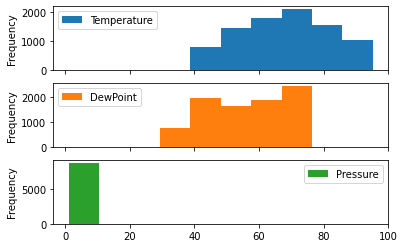

In [239]:
climate2010.plot(kind='hist', subplots=True)
plt.show()

## Final thoughts

### You now can...

* Import many types of datasets and deal with import issues
* Export data to facilitate collaborative data science
* Perform statistical and visual EDA (Exploratory Data Analysis) natively in pandas